# Laptop Price Project

#### The purpose of this project is to create a regression model using the available data to predict laptop prices. This model attempts to determine the impact of various features (such as processor speed, memory size, storage capacity, etc.) on computer prices. Thus, based on the existing data, it can be used to predict the price of a specific computer.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('laptop_data.csv')

In [3]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [5]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [6]:
df.shape

(1303, 12)

In [7]:
df.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


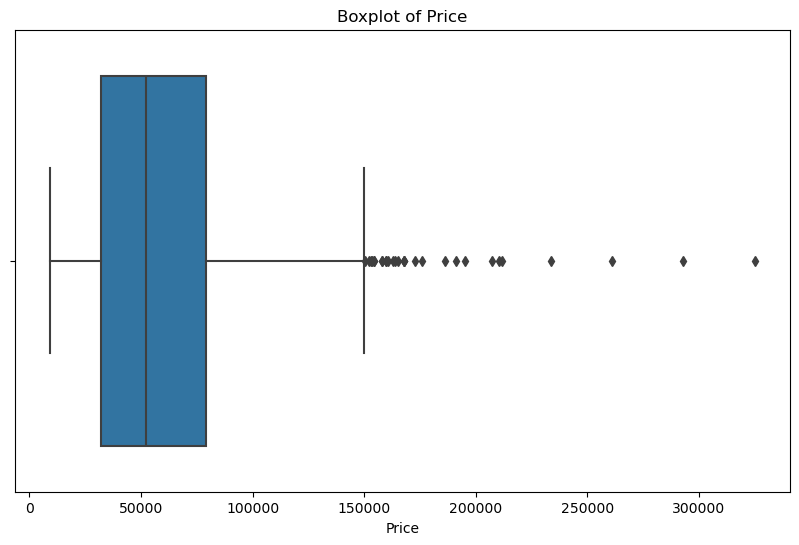

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Price'])
plt.title('Boxplot of Price')
plt.show()

In [9]:
#df = df[df['Price'] <= 200000]

In [10]:
df.drop(['Unnamed: 0'], axis = 1, inplace=True )

In [11]:
df['Company'].nunique()

19

In [12]:
df['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Mediacom',
       'Samsung', 'Google', 'Fujitsu', 'Razer', 'LG'], dtype=object)

In [13]:
df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)

In [14]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [15]:
df['Ram'].value_counts()
#I am checking whether the data containing RAM information has been converted into the desired numerical values.

Ram
8     618
4     375
16    199
6      41
12     25
2      22
32     13
24      3
Name: count, dtype: int64

In [16]:
df['Memory'].value_counts()

Memory
256GB SSD                        410
1TB HDD                          223
500GB HDD                        132
512GB SSD                        117
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              13
1TB SSD                           11
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [17]:
df['SSD_GB'] = df['Memory'].str.extractall('(\d+)(TB|GB) SSD').apply(lambda x: int(x[0]) * (1000 if x[1] == 'TB' else 1), axis=1).groupby(level=0).sum()
df['HDD_GB'] = df['Memory'].str.extractall('(\d+)(TB|GB) HDD').apply(lambda x: int(x[0]) * (1000 if x[1] == 'TB' else 1), axis=1).groupby(level=0).sum()
df['Flash_GB'] = df['Memory'].str.extractall('(\d+)(TB|GB) Flash').apply(lambda x: int(x[0]) * (1000 if x[1] == 'TB' else 1), axis=1).groupby(level=0).sum()
df['Hybrid_GB'] = df['Memory'].str.extractall('(\d+)(TB|GB) Hybrid').apply(lambda x: int(x[0]) * (1000 if x[1] == 'TB' else 1), axis=1).groupby(level=0).sum()

df.fillna(0, inplace=True)
#We divided the RAM row into four and converted it to numerical values as HDD, SSD, Flash, Hybrid.

In [18]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,SSD_GB,HDD_GB,Flash_GB,Hybrid_GB
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,128.0,0.0,0.0,0.0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0.0,0.0,128.0,0.0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,256.0,0.0,0.0,0.0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,512.0,0.0,0.0,0.0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,256.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,128.0,0.0,0.0,0.0
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,512.0,0.0,0.0,0.0
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200,0.0,0.0,64.0,0.0
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,0.0,1000.0,0.0,0.0


In [19]:
df['ScreenResolution'].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [20]:
## Splitting resolution values
df['Width'], df['Height'] = df['ScreenResolution'].str.extract('(\d+)x(\d+)').astype(int).values.T

In [21]:
# Encoding screen features
df['IPS_Panel'] = df['ScreenResolution'].apply(lambda x: 'IPS' in x).astype(int)
df['Retina_Display'] = df['ScreenResolution'].apply(lambda x: 'Retina Display' in x).astype(int)
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 'Touchscreen' in x).astype(int)
df['4K_Ultra_HD'] = df['ScreenResolution'].apply(lambda x: '4K Ultra HD' in x).astype(int)
df['Quad_HD_Plus'] = df['ScreenResolution'].apply(lambda x: 'Quad HD+' in x).astype(int)
df.fillna(0, inplace=True)

In [22]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,SSD_GB,HDD_GB,Flash_GB,Hybrid_GB,Width,Height,IPS_Panel,Retina_Display,Touchscreen,4K_Ultra_HD,Quad_HD_Plus
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,128.0,0.0,0.0,0.0,2560,1600,1,1,0,0,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0.0,0.0,128.0,0.0,1440,900,0,0,0,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,256.0,0.0,0.0,0.0,1920,1080,0,0,0,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,512.0,0.0,0.0,0.0,2880,1800,1,1,0,0,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,256.0,0.0,0.0,0.0,2560,1600,1,1,0,0,0


In [23]:
#We converted the weight class, which was represented as a string, into a float format.
df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)

In [24]:
#We only examined the CPUs based on their clock speeds and focused on the GHz values, which are important to us.
#df['Cpu_Speed_GHz'] = df['Cpu'].str.extract('(\d+\.\d+)GHz').astype(float)

In [25]:
df = pd.get_dummies(df, columns=['Cpu'],  dtype = int)

In [26]:
df = pd.get_dummies(df, columns=['Gpu'],  dtype = int)

In [27]:
df = pd.get_dummies(df, columns=['TypeName'],  dtype = int)

In [28]:
df.head()

,Company,Inches,ScreenResolution,Ram,Memory,OpSys,Weight,Price,SSD_GB,HDD_GB,Flash_GB,Hybrid_GB,Width,Height,IPS_Panel,Retina_Display,Touchscreen,4K_Ultra_HD,Quad_HD_Plus,Cpu_AMD A10-Series 9600P 2.4GHz,Cpu_AMD A10-Series 9620P 2.5GHz,Cpu_AMD A10-Series A10-9620P 2.5GHz,Cpu_AMD A12-Series 9700P 2.5GHz,Cpu_AMD A12-Series 9720P 2.7GHz,Cpu_AMD A12-Series 9720P 3.6GHz,Cpu_AMD A4-Series 7210 2.2GHz,Cpu_AMD A6-Series 7310 2GHz,Cpu_AMD A6-Series 9220 2.5GHz,Cpu_AMD A6-Series 9220 2.9GHz,Cpu_AMD A6-Series A6-9220 2.5GHz,Cpu_AMD A8-Series 7410 2.2GHz,Cpu_AMD A9-Series 9410 2.9GHz,Cpu_AMD A9-Series 9420 2.9GHz,Cpu_AMD A9-Series 9420 3GHz,Cpu_AMD A9-Series A9-9420 3GHz,Cpu_AMD E-Series 6110 1.5GHz,Cpu_AMD E-Series 7110 1.8GHz,Cpu_AMD E-Series 9000 2.2GHz,Cpu_AMD E-Series 9000e 1.5GHz,Cpu_AMD E-Series E2-6110 1.5GHz,Cpu_AMD E-Series E2-9000 2.2GHz,Cpu_AMD E-Series E2-9000e 1.5GHz,Cpu_AMD FX 8800P 2.1GHz,Cpu_AMD FX 9830P 3GHz,Cpu_AMD Ryzen 1600 3.2GHz,Cpu_AMD Ryzen 1700 3GHz,Cpu_Intel Atom X5-Z8350 1.44GHz,Cpu_Intel Atom Z8350 1.92GHz,Cpu_Intel Atom x5-Z8300 1.44GHz,Cpu_Intel Atom x5-Z8350 1.44GHz,Cpu_Intel Atom x5-Z8550 1.44GHz,Cpu_Intel Celeron Dual Core 3205U 1.5GHz,Cpu_Intel Celeron Dual Core 3855U 1.6GHz,Cpu_Intel Celeron Dual Core N3050 1.6GHz,Cpu_Intel Celeron Dual Core N3060 1.60GHz,Cpu_Intel Celeron Dual Core N3060 1.6GHz,Cpu_Intel Celeron Dual Core N3350 1.1GHz,Cpu_Intel Celeron Dual Core N3350 2.0GHz,Cpu_Intel Celeron Dual Core N3350 2GHz,Cpu_Intel Celeron Quad Core N3160 1.6GHz,Cpu_Intel Celeron Quad Core N3450 1.1GHz,Cpu_Intel Celeron Quad Core N3710 1.6GHz,Cpu_Intel Core M 1.1GHz,Cpu_Intel Core M 1.2GHz,Cpu_Intel Core M 6Y30 0.9GHz,Cpu_Intel Core M 6Y54 1.1GHz,Cpu_Intel Core M 6Y75 1.2GHz,Cpu_Intel Core M 7Y30 1.0GHz,Cpu_Intel Core M M3-6Y30 0.9GHz,Cpu_Intel Core M M7-6Y75 1.2GHz,Cpu_Intel Core M m3 1.2GHz,Cpu_Intel Core M m3-7Y30 2.2GHz,Cpu_Intel Core M m7-6Y75 1.2GHz,Cpu_Intel Core i3 6006U 2.0GHz,Cpu_Intel Core i3 6006U 2.2GHz,Cpu_Intel Core i3 6006U 2GHz,Cpu_Intel Core i3 6100U 2.1GHz,Cpu_Intel Core i3 6100U 2.3GHz,Cpu_Intel Core i3 7100U 2.4GHz,Cpu_Intel Core i3 7130U 2.7GHz,Cpu_Intel Core i5 1.3GHz,Cpu_Intel Core i5 1.6GHz,Cpu_Intel Core i5 1.8GHz,Cpu_Intel Core i5 2.0GHz,Cpu_Intel Core i5 2.3GHz,Cpu_Intel Core i5 2.9GHz,Cpu_Intel Core i5 3.1GHz,Cpu_Intel Core i5 6200U 2.3GHz,Cpu_Intel Core i5 6260U 1.8GHz,Cpu_Intel Core i5 6300HQ 2.3GHz,Cpu_Intel Core i5 6300U 2.4GHz,Cpu_Intel Core i5 6440HQ 2.6GHz,Cpu_Intel Core i5 7200U 2.50GHz,Cpu_Intel Core i5 7200U 2.5GHz,Cpu_Intel Core i5 7200U 2.70GHz,Cpu_Intel Core i5 7200U 2.7GHz,Cpu_Intel Core i5 7300HQ 2.5GHz,Cpu_Intel Core i5 7300U 2.6GHz,Cpu_Intel Core i5 7440HQ 2.8GHz,Cpu_Intel Core i5 7500U 2.7GHz,Cpu_Intel Core i5 7Y54 1.2GHz,Cpu_Intel Core i5 7Y57 1.2GHz,Cpu_Intel Core i5 8250U 1.6GHz,Cpu_Intel Core i7 2.2GHz,Cpu_Intel Core i7 2.7GHz,Cpu_Intel Core i7 2.8GHz,Cpu_Intel Core i7 2.9GHz,Cpu_Intel Core i7 6500U 2.50GHz,Cpu_Intel Core i7 6500U 2.5GHz,Cpu_Intel Core i7 6560U 2.2GHz,Cpu_Intel Core i7 6600U 2.6GHz,Cpu_Intel Core i7 6700HQ 2.6GHz,Cpu_Intel Core i7 6820HK 2.7GHz,Cpu_Intel Core i7 6820HQ 2.7GHz,Cpu_Intel Core i7 6920HQ 2.9GHz,Cpu_Intel Core i7 7500U 2.5GHz,Cpu_Intel Core i7 7500U 2.7GHz,Cpu_Intel Core i7 7560U 2.4GHz,Cpu_Intel Core i7 7600U 2.8GHz,Cpu_Intel Core i7 7660U 2.5GHz,Cpu_Intel Core i7 7700HQ 2.7GHz,Cpu_Intel Core i7 7700HQ 2.8GHz,Cpu_Intel Core i7 7820HK 2.9GHz,Cpu_Intel Core i7 7820HQ 2.9GHz,Cpu_Intel Core i7 7Y75 1.3GHz,Cpu_Intel Core i7 8550U 1.8GHz,Cpu_Intel Core i7 8650U 1.9GHz,Cpu_Intel Pentium Dual Core 4405U 2.1GHz,Cpu_Intel Pentium Dual Core 4405Y 1.5GHz,Cpu_Intel Pentium Dual Core N4200 1.1GHz,Cpu_Intel Pentium Quad Core N3700 1.6GHz,Cpu_Intel Pentium Quad Core N3710 1.6GHz,Cpu_Intel Pentium Quad Core N4200 1.1GHz,Cpu_Intel Xeon E3-1505M V6 3GHz,Cpu_Samsung Cortex A72&A53 2.0GHz,Gpu_AMD FirePro W4190M,Gpu_AMD FirePro W4190M,Gpu_AMD FirePro W5130M,Gpu_AMD FirePro W6150M,Gpu_AMD R17M-M1-70,Gpu_AMD R4 Graphics,Gpu_AMD Radeon 520,Gpu_AMD Radeon 53

In [29]:
#We transformed these values into non-hierarchical numerical values using one-hot encoding.
dummies_df = pd.get_dummies(df[['Company','OpSys']], drop_first=True, dtype = int)
df = pd.concat([df, dummies_df], axis=1)

In [30]:
df.drop(['Memory', 'ScreenResolution','Company','OpSys'], axis=1, inplace=True)

In [31]:
df.head()

,Inches,Ram,Weight,Price,SSD_GB,HDD_GB,Flash_GB,Hybrid_GB,Width,Height,IPS_Panel,Retina_Display,Touchscreen,4K_Ultra_HD,Quad_HD_Plus,Cpu_AMD A10-Series 9600P 2.4GHz,Cpu_AMD A10-Series 9620P 2.5GHz,Cpu_AMD A10-Series A10-9620P 2.5GHz,Cpu_AMD A12-Series 9700P 2.5GHz,Cpu_AMD A12-Series 9720P 2.7GHz,Cpu_AMD A12-Series 9720P 3.6GHz,Cpu_AMD A4-Series 7210 2.2GHz,Cpu_AMD A6-Series 7310 2GHz,Cpu_AMD A6-Series 9220 2.5GHz,Cpu_AMD A6-Series 9220 2.9GHz,Cpu_AMD A6-Series A6-9220 2.5GHz,Cpu_AMD A8-Series 7410 2.2GHz,Cpu_AMD A9-Series 9410 2.9GHz,Cpu_AMD A9-Series 9420 2.9GHz,Cpu_AMD A9-Series 9420 3GHz,Cpu_AMD A9-Series A9-9420 3GHz,Cpu_AMD E-Series 6110 1.5GHz,Cpu_AMD E-Series 7110 1.8GHz,Cpu_AMD E-Series 9000 2.2GHz,Cpu_AMD E-Series 9000e 1.5GHz,Cpu_AMD E-Series E2-6110 1.5GHz,Cpu_AMD E-Series E2-9000 2.2GHz,Cpu_AMD E-Series E2-9000e 1.5GHz,Cpu_AMD FX 8800P 2.1GHz,Cpu_AMD FX 9830P 3GHz,Cpu_AMD Ryzen 1600 3.2GHz,Cpu_AMD Ryzen 1700 3GHz,Cpu_Intel Atom X5-Z8350 1.44GHz,Cpu_Intel Atom Z8350 1.92GHz,Cpu_Intel Atom x5-Z8300 1.44GHz,Cpu_Intel Atom x5-Z8350 1.44GHz,Cpu_Intel Atom x5-Z8550 1.44GHz,Cpu_Intel Celeron Dual Core 3205U 1.5GHz,Cpu_Intel Celeron Dual Core 3855U 1.6GHz,Cpu_Intel Celeron Dual Core N3050 1.6GHz,Cpu_Intel Celeron Dual Core N3060 1.60GHz,Cpu_Intel Celeron Dual Core N3060 1.6GHz,Cpu_Intel Celeron Dual Core N3350 1.1GHz,Cpu_Intel Celeron Dual Core N3350 2.0GHz,Cpu_Intel Celeron Dual Core N3350 2GHz,Cpu_Intel Celeron Quad Core N3160 1.6GHz,Cpu_Intel Celeron Quad Core N3450 1.1GHz,Cpu_Intel Celeron Quad Core N3710 1.6GHz,Cpu_Intel Core M 1.1GHz,Cpu_Intel Core M 1.2GHz,Cpu_Intel Core M 6Y30 0.9GHz,Cpu_Intel Core M 6Y54 1.1GHz,Cpu_Intel Core M 6Y75 1.2GHz,Cpu_Intel Core M 7Y30 1.0GHz,Cpu_Intel Core M M3-6Y30 0.9GHz,Cpu_Intel Core M M7-6Y75 1.2GHz,Cpu_Intel Core M m3 1.2GHz,Cpu_Intel Core M m3-7Y30 2.2GHz,Cpu_Intel Core M m7-6Y75 1.2GHz,Cpu_Intel Core i3 6006U 2.0GHz,Cpu_Intel Core i3 6006U 2.2GHz,Cpu_Intel Core i3 6006U 2GHz,Cpu_Intel Core i3 6100U 2.1GHz,Cpu_Intel Core i3 6100U 2.3GHz,Cpu_Intel Core i3 7100U 2.4GHz,Cpu_Intel Core i3 7130U 2.7GHz,Cpu_Intel Core i5 1.3GHz,Cpu_Intel Core i5 1.6GHz,Cpu_Intel Core i5 1.8GHz,Cpu_Intel Core i5 2.0GHz,Cpu_Intel Core i5 2.3GHz,Cpu_Intel Core i5 2.9GHz,Cpu_Intel Core i5 3.1GHz,Cpu_Intel Core i5 6200U 2.3GHz,Cpu_Intel Core i5 6260U 1.8GHz,Cpu_Intel Core i5 6300HQ 2.3GHz,Cpu_Intel Core i5 6300U 2.4GHz,Cpu_Intel Core i5 6440HQ 2.6GHz,Cpu_Intel Core i5 7200U 2.50GHz,Cpu_Intel Core i5 7200U 2.5GHz,Cpu_Intel Core i5 7200U 2.70GHz,Cpu_Intel Core i5 7200U 2.7GHz,Cpu_Intel Core i5 7300HQ 2.5GHz,Cpu_Intel Core i5 7300U 2.6GHz,Cpu_Intel Core i5 7440HQ 2.8GHz,Cpu_Intel Core i5 7500U 2.7GHz,Cpu_Intel Core i5 7Y54 1.2GHz,Cpu_Intel Core i5 7Y57 1.2GHz,Cpu_Intel Core i5 8250U 1.6GHz,Cpu_Intel Core i7 2.2GHz,Cpu_Intel Core i7 2.7GHz,Cpu_Intel Core i7 2.8GHz,Cpu_Intel Core i7 2.9GHz,Cpu_Intel Core i7 6500U 2.50GHz,Cpu_Intel Core i7 6500U 2.5GHz,Cpu_Intel Core i7 6560U 2.2GHz,Cpu_Intel Core i7 6600U 2.6GHz,Cpu_Intel Core i7 6700HQ 2.6GHz,Cpu_Intel Core i7 6820HK 2.7GHz,Cpu_Intel Core i7 6820HQ 2.7GHz,Cpu_Intel Core i7 6920HQ 2.9GHz,Cpu_Intel Core i7 7500U 2.5GHz,Cpu_Intel Core i7 7500U 2.7GHz,Cpu_Intel Core i7 7560U 2.4GHz,Cpu_Intel Core i7 7600U 2.8GHz,Cpu_Intel Core i7 7660U 2.5GHz,Cpu_Intel Core i7 7700HQ 2.7GHz,Cpu_Intel Core i7 7700HQ 2.8GHz,Cpu_Intel Core i7 7820HK 2.9GHz,Cpu_Intel Core i7 7820HQ 2.9GHz,Cpu_Intel Core i7 7Y75 1.3GHz,Cpu_Intel Core i7 8550U 1.8GHz,Cpu_Intel Core i7 8650U 1.9GHz,Cpu_Intel Pentium Dual Core 4405U 2.1GHz,Cpu_Intel Pentium Dual Core 4405Y 1.5GHz,Cpu_Intel Pentium Dual Core N4200 1.1GHz,Cpu_Intel Pentium Quad Core N3700 1.6GHz,Cpu_Intel Pentium Quad Core N3710 1.6GHz,Cpu_Intel Pentium Quad Core N4200 1.1GHz,Cpu_Intel Xeon E3-1505M V6 3GHz,Cpu_Samsung Cortex A72&A53 2.0GHz,Gpu_AMD FirePro W4190M,Gpu_AMD FirePro W4190M,Gpu_AMD FirePro W5130M,Gpu_AMD FirePro W6150M,Gpu_AMD R17M-M1-70,Gpu_AMD R4 Graphics,Gpu_AMD Radeon 520,Gpu_AMD Radeon 530,Gpu_AMD Radeon 540,Gpu_AMD Radeon Pr

In [32]:
abs(df.corr(numeric_only=True)['Price']).sort_values(ascending=False)

Price                                 1.000000
Ram                                   0.734512
SSD_GB                                0.664150
TypeName_Notebook                     0.572023
Width                                 0.549867
                                        ...   
Gpu_Nvidia GeForce GTX 960<U+039C>    0.001762
Cpu_Intel Core i5 7500U 2.7GHz        0.000967
Gpu_Intel HD Graphics 620             0.000621
Cpu_Intel Core i5 7200U 2.7GHz        0.000452
Gpu_AMD Radeon R7 M360                0.000237
Name: Price, Length: 271, dtype: float64

In [33]:
df.describe()

,Inches,Ram,Weight,Price,SSD_GB,HDD_GB,Flash_GB,Hybrid_GB,Width,Height,IPS_Panel,Retina_Display,Touchscreen,4K_Ultra_HD,Quad_HD_Plus,Cpu_AMD A10-Series 9600P 2.4GHz,Cpu_AMD A10-Series 9620P 2.5GHz,Cpu_AMD A10-Series A10-9620P 2.5GHz,Cpu_AMD A12-Series 9700P 2.5GHz,Cpu_AMD A12-Series 9720P 2.7GHz,Cpu_AMD A12-Series 9720P 3.6GHz,Cpu_AMD A4-Series 7210 2.2GHz,Cpu_AMD A6-Series 7310 2GHz,Cpu_AMD A6-Series 9220 2.5GHz,Cpu_AMD A6-Series 9220 2.9GHz,Cpu_AMD A6-Series A6-9220 2.5GHz,Cpu_AMD A8-Series 7410 2.2GHz,Cpu_AMD A9-Series 9410 2.9GHz,Cpu_AMD A9-Series 9420 2.9GHz,Cpu_AMD A9-Series 9420 3GHz,Cpu_AMD A9-Series A9-9420 3GHz,Cpu_AMD E-Series 6110 1.5GHz,Cpu_AMD E-Series 7110 1.8GHz,Cpu_AMD E-Series 9000 2.2GHz,Cpu_AMD E-Series 9000e 1.5GHz,Cpu_AMD E-Series E2-6110 1.5GHz,Cpu_AMD E-Series E2-9000 2.2GHz,Cpu_AMD E-Series E2-9000e 1.5GHz,Cpu_AMD FX 8800P 2.1GHz,Cpu_AMD FX 9830P 3GHz,Cpu_AMD Ryzen 1600 3.2GHz,Cpu_AMD Ryzen 1700 3GHz,Cpu_Intel Atom X5-Z8350 1.44GHz,Cpu_Intel Atom Z8350 1.92GHz,Cpu_Intel Atom x5-Z8300 1.44GHz,Cpu_Intel Atom x5-Z8350 1.44GHz,Cpu_Intel Atom x5-Z8550 1.44GHz,Cpu_Intel Celeron Dual Core 3205U 1.5GHz,Cpu_Intel Celeron Dual Core 3855U 1.6GHz,Cpu_Intel Celeron Dual Core N3050 1.6GHz,Cpu_Intel Celeron Dual Core N3060 1.60GHz,Cpu_Intel Celeron Dual Core N3060 1.6GHz,Cpu_Intel Celeron Dual Core N3350 1.1GHz,Cpu_Intel Celeron Dual Core N3350 2.0GHz,Cpu_Intel Celeron Dual Core N3350 2GHz,Cpu_Intel Celeron Quad Core N3160 1.6GHz,Cpu_Intel Celeron Quad Core N3450 1.1GHz,Cpu_Intel Celeron Quad Core N3710 1.6GHz,Cpu_Intel Core M 1.1GHz,Cpu_Intel Core M 1.2GHz,Cpu_Intel Core M 6Y30 0.9GHz,Cpu_Intel Core M 6Y54 1.1GHz,Cpu_Intel Core M 6Y75 1.2GHz,Cpu_Intel Core M 7Y30 1.0GHz,Cpu_Intel Core M M3-6Y30 0.9GHz,Cpu_Intel Core M M7-6Y75 1.2GHz,Cpu_Intel Core M m3 1.2GHz,Cpu_Intel Core M m3-7Y30 2.2GHz,Cpu_Intel Core M m7-6Y75 1.2GHz,Cpu_Intel Core i3 6006U 2.0GHz,Cpu_Intel Core i3 6006U 2.2GHz,Cpu_Intel Core i3 6006U 2GHz,Cpu_Intel Core i3 6100U 2.1GHz,Cpu_Intel Core i3 6100U 2.3GHz,Cpu_Intel Core i3 7100U 2.4GHz,Cpu_Intel Core i3 7130U 2.7GHz,Cpu_Intel Core i5 1.3GHz,Cpu_Intel Core i5 1.6GHz,Cpu_Intel Core i5 1.8GHz,Cpu_Intel Core i5 2.0GHz,Cpu_Intel Core i5 2.3GHz,Cpu_Intel Core i5 2.9GHz,Cpu_Intel Core i5 3.1GHz,Cpu_Intel Core i5 6200U 2.3GHz,Cpu_Intel Core i5 6260U 1.8GHz,Cpu_Intel Core i5 6300HQ 2.3GHz,Cpu_Intel Core i5 6300U 2.4GHz,Cpu_Intel Core i5 6440HQ 2.6GHz,Cpu_Intel Core i5 7200U 2.50GHz,Cpu_Intel Core i5 7200U 2.5GHz,Cpu_Intel Core i5 7200U 2.70GHz,Cpu_Intel Core i5 7200U 2.7GHz,Cpu_Intel Core i5 7300HQ 2.5GHz,Cpu_Intel Core i5 7300U 2.6GHz,Cpu_Intel Core i5 7440HQ 2.8GHz,Cpu_Intel Core i5 7500U 2.7GHz,Cpu_Intel Core i5 7Y54 1.2GHz,Cpu_Intel Core i5 7Y57 1.2GHz,Cpu_Intel Core i5 8250U 1.6GHz,Cpu_Intel Core i7 2.2GHz,Cpu_Intel Core i7 2.7GHz,Cpu_Intel Core i7 2.8GHz,Cpu_Intel Core i7 2.9GHz,Cpu_Intel Core i7 6500U 2.50GHz,Cpu_Intel Core i7 6500U 2.5GHz,Cpu_Intel Core i7 6560U 2.2GHz,Cpu_Intel Core i7 6600U 2.6GHz,Cpu_Intel Core i7 6700HQ 2.6GHz,Cpu_Intel Core i7 6820HK 2.7GHz,Cpu_Intel Core i7 6820HQ 2.7GHz,Cpu_Intel Core i7 6920HQ 2.9GHz,Cpu_Intel Core i7 7500U 2.5GHz,Cpu_Intel Core i7 7500U 2.7GHz,Cpu_Intel Core i7 7560U 2.4GHz,Cpu_Intel Core i7 7600U 2.8GHz,Cpu_Intel Core i7 7660U 2.5GHz,Cpu_Intel Core i7 7700HQ 2.7GHz,Cpu_Intel Core i7 7700HQ 2.8GHz,Cpu_Intel Core i7 7820HK 2.9GHz,Cpu_Intel Core i7 7820HQ 2.9GHz,Cpu_Intel Core i7 7Y75 1.3GHz,Cpu_Intel Core i7 8550U 1.8GHz,Cpu_Intel Core i7 8650U 1.9GHz,Cpu_Intel Pentium Dual Core 4405U 2.1GHz,Cpu_Intel Pentium Dual Core 4405Y 1.5GHz,Cpu_Intel Pentium Dual Core N4200 1.1GHz,Cpu_Intel Pentium Quad Core N3700 1.6GHz,Cpu_Intel Pentium Quad Core N3710 1.6GHz,Cpu_Intel Pentium Quad Core N4200 1.1GHz,Cpu_Intel Xeon E3-1505M V6 3GHz,Cpu_Samsung Cortex A72&A53 2.0GHz,Gpu_AMD FirePro W4190M,Gpu_AMD FirePro W4190M,Gpu_AMD FirePro W5130M,Gpu_AMD FirePro W6150M,Gpu_AMD R17M-M1-70,Gpu_AMD R4 Graphics,Gpu_AMD Radeon 520,Gpu_AMD Radeon 530,Gpu_AMD Radeon 540,Gpu_AMD Radeon Pr

In [34]:
#There are no outliers in the data, so we can start the training.
df.head()

,Inches,Ram,Weight,Price,SSD_GB,HDD_GB,Flash_GB,Hybrid_GB,Width,Height,IPS_Panel,Retina_Display,Touchscreen,4K_Ultra_HD,Quad_HD_Plus,Cpu_AMD A10-Series 9600P 2.4GHz,Cpu_AMD A10-Series 9620P 2.5GHz,Cpu_AMD A10-Series A10-9620P 2.5GHz,Cpu_AMD A12-Series 9700P 2.5GHz,Cpu_AMD A12-Series 9720P 2.7GHz,Cpu_AMD A12-Series 9720P 3.6GHz,Cpu_AMD A4-Series 7210 2.2GHz,Cpu_AMD A6-Series 7310 2GHz,Cpu_AMD A6-Series 9220 2.5GHz,Cpu_AMD A6-Series 9220 2.9GHz,Cpu_AMD A6-Series A6-9220 2.5GHz,Cpu_AMD A8-Series 7410 2.2GHz,Cpu_AMD A9-Series 9410 2.9GHz,Cpu_AMD A9-Series 9420 2.9GHz,Cpu_AMD A9-Series 9420 3GHz,Cpu_AMD A9-Series A9-9420 3GHz,Cpu_AMD E-Series 6110 1.5GHz,Cpu_AMD E-Series 7110 1.8GHz,Cpu_AMD E-Series 9000 2.2GHz,Cpu_AMD E-Series 9000e 1.5GHz,Cpu_AMD E-Series E2-6110 1.5GHz,Cpu_AMD E-Series E2-9000 2.2GHz,Cpu_AMD E-Series E2-9000e 1.5GHz,Cpu_AMD FX 8800P 2.1GHz,Cpu_AMD FX 9830P 3GHz,Cpu_AMD Ryzen 1600 3.2GHz,Cpu_AMD Ryzen 1700 3GHz,Cpu_Intel Atom X5-Z8350 1.44GHz,Cpu_Intel Atom Z8350 1.92GHz,Cpu_Intel Atom x5-Z8300 1.44GHz,Cpu_Intel Atom x5-Z8350 1.44GHz,Cpu_Intel Atom x5-Z8550 1.44GHz,Cpu_Intel Celeron Dual Core 3205U 1.5GHz,Cpu_Intel Celeron Dual Core 3855U 1.6GHz,Cpu_Intel Celeron Dual Core N3050 1.6GHz,Cpu_Intel Celeron Dual Core N3060 1.60GHz,Cpu_Intel Celeron Dual Core N3060 1.6GHz,Cpu_Intel Celeron Dual Core N3350 1.1GHz,Cpu_Intel Celeron Dual Core N3350 2.0GHz,Cpu_Intel Celeron Dual Core N3350 2GHz,Cpu_Intel Celeron Quad Core N3160 1.6GHz,Cpu_Intel Celeron Quad Core N3450 1.1GHz,Cpu_Intel Celeron Quad Core N3710 1.6GHz,Cpu_Intel Core M 1.1GHz,Cpu_Intel Core M 1.2GHz,Cpu_Intel Core M 6Y30 0.9GHz,Cpu_Intel Core M 6Y54 1.1GHz,Cpu_Intel Core M 6Y75 1.2GHz,Cpu_Intel Core M 7Y30 1.0GHz,Cpu_Intel Core M M3-6Y30 0.9GHz,Cpu_Intel Core M M7-6Y75 1.2GHz,Cpu_Intel Core M m3 1.2GHz,Cpu_Intel Core M m3-7Y30 2.2GHz,Cpu_Intel Core M m7-6Y75 1.2GHz,Cpu_Intel Core i3 6006U 2.0GHz,Cpu_Intel Core i3 6006U 2.2GHz,Cpu_Intel Core i3 6006U 2GHz,Cpu_Intel Core i3 6100U 2.1GHz,Cpu_Intel Core i3 6100U 2.3GHz,Cpu_Intel Core i3 7100U 2.4GHz,Cpu_Intel Core i3 7130U 2.7GHz,Cpu_Intel Core i5 1.3GHz,Cpu_Intel Core i5 1.6GHz,Cpu_Intel Core i5 1.8GHz,Cpu_Intel Core i5 2.0GHz,Cpu_Intel Core i5 2.3GHz,Cpu_Intel Core i5 2.9GHz,Cpu_Intel Core i5 3.1GHz,Cpu_Intel Core i5 6200U 2.3GHz,Cpu_Intel Core i5 6260U 1.8GHz,Cpu_Intel Core i5 6300HQ 2.3GHz,Cpu_Intel Core i5 6300U 2.4GHz,Cpu_Intel Core i5 6440HQ 2.6GHz,Cpu_Intel Core i5 7200U 2.50GHz,Cpu_Intel Core i5 7200U 2.5GHz,Cpu_Intel Core i5 7200U 2.70GHz,Cpu_Intel Core i5 7200U 2.7GHz,Cpu_Intel Core i5 7300HQ 2.5GHz,Cpu_Intel Core i5 7300U 2.6GHz,Cpu_Intel Core i5 7440HQ 2.8GHz,Cpu_Intel Core i5 7500U 2.7GHz,Cpu_Intel Core i5 7Y54 1.2GHz,Cpu_Intel Core i5 7Y57 1.2GHz,Cpu_Intel Core i5 8250U 1.6GHz,Cpu_Intel Core i7 2.2GHz,Cpu_Intel Core i7 2.7GHz,Cpu_Intel Core i7 2.8GHz,Cpu_Intel Core i7 2.9GHz,Cpu_Intel Core i7 6500U 2.50GHz,Cpu_Intel Core i7 6500U 2.5GHz,Cpu_Intel Core i7 6560U 2.2GHz,Cpu_Intel Core i7 6600U 2.6GHz,Cpu_Intel Core i7 6700HQ 2.6GHz,Cpu_Intel Core i7 6820HK 2.7GHz,Cpu_Intel Core i7 6820HQ 2.7GHz,Cpu_Intel Core i7 6920HQ 2.9GHz,Cpu_Intel Core i7 7500U 2.5GHz,Cpu_Intel Core i7 7500U 2.7GHz,Cpu_Intel Core i7 7560U 2.4GHz,Cpu_Intel Core i7 7600U 2.8GHz,Cpu_Intel Core i7 7660U 2.5GHz,Cpu_Intel Core i7 7700HQ 2.7GHz,Cpu_Intel Core i7 7700HQ 2.8GHz,Cpu_Intel Core i7 7820HK 2.9GHz,Cpu_Intel Core i7 7820HQ 2.9GHz,Cpu_Intel Core i7 7Y75 1.3GHz,Cpu_Intel Core i7 8550U 1.8GHz,Cpu_Intel Core i7 8650U 1.9GHz,Cpu_Intel Pentium Dual Core 4405U 2.1GHz,Cpu_Intel Pentium Dual Core 4405Y 1.5GHz,Cpu_Intel Pentium Dual Core N4200 1.1GHz,Cpu_Intel Pentium Quad Core N3700 1.6GHz,Cpu_Intel Pentium Quad Core N3710 1.6GHz,Cpu_Intel Pentium Quad Core N4200 1.1GHz,Cpu_Intel Xeon E3-1505M V6 3GHz,Cpu_Samsung Cortex A72&A53 2.0GHz,Gpu_AMD FirePro W4190M,Gpu_AMD FirePro W4190M,Gpu_AMD FirePro W5130M,Gpu_AMD FirePro W6150M,Gpu_AMD R17M-M1-70,Gpu_AMD R4 Graphics,Gpu_AMD Radeon 520,Gpu_AMD Radeon 530,Gpu_AMD Radeon 540,Gpu_AMD Radeon Pr

In [35]:
x = df.drop(['Price'], axis=1)
y=df[['Price']]

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [37]:
lr=LinearRegression()

In [38]:
lr.fit(x_train,y_train)

LinearRegression()

In [39]:
tahmin=lr.predict(x_test)

In [40]:
r2_score(y_test,tahmin)

-812564751696754.8

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error


def algo_test(x,y):
        #Bütün modelleri tanımlıyorum
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
       
        
        algos=[L,R,Lass,E,ETR,GBR,kn,dt,xgb]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','Extra Tree','Gradient Boosting','KNeighborsRegressor','Decision Tree','XGBRegressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.2,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        #Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            

        #result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
       #oluşturduğum result tablosunu doğruluk oranına (r2_score) göre sıralayıp dönüyor
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [42]:
# Özellik isimlerindeki problemli karakterleri değiştirme
x.columns = [col.replace('[', '').replace(']', '').replace('<', '') for col in x.columns]

# Modeli tekrar çalıştırma
algo_test(x, y)

,R_Squared,RMSE,MAE
XGBRegressor,8.528349e-01,1.307569e+04,8.947354e+03
Gradient Boosting,8.365328e-01,1.378090e+04,1.042112e+04
Lasso,8.267635e-01,1.418672e+04,1.002443e+04
Ridge,8.244649e-01,1.428052e+04,1.033811e+04
Extra Tree,7.384635e-01,1.743124e+04,1.162112e+04
KNeighborsRegressor,7.141629e-01,1.822307e+04,1.203908e+04
Decision Tree,6.793598e-01,1.930062e+04,1.240755e+04
ElasticNet,6.737214e-01,1.946958e+04,1.456569e+04
Linear,-8.125648e+14,9.716082e+11,1.660813e+11
